### Importing libraraies

In [336]:
# import os
# import datetime

# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# import tensorflow as tf

# from tensorflow import keras
# from tensorflow.keras import layers

# tf.keras.backend.clear_session()

In [337]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt   

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras import Model
from keras.utils import to_categorical

### Loading Dataset

#### Lower Back Pain Symptoms Dataset

Source: https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

In [338]:
spine_data = pd.read_csv('Dataset_spine.csv', 
                         skiprows=1,
                         names=['pelvic_incidence',
                                'pelvic tilt',
                                'lumbar_lordosis_angle',
                                'sacral_slope',
                                'pelvic_radius',
                                'degree_spondylolisthesis',
                                'pelvic_slope',
                                'direct_tilt',
                                'thoracic_slope',
                                'cervical_tilt',
                                'sacrum_angle',
                                'scoliosis_slope',
                                'class_att'])

spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [339]:
spine_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att
0,36.157830,-0.810514,33.627314,36.968344,135.936910,-2.092507,0.332027,10.4752,17.1414,13.60366,-12.162522,28.3449,Normal
1,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344,0.233195,23.3207,13.7148,10.46265,-9.187554,27.8587,Normal
2,74.854480,13.909084,62.693259,60.945396,115.208701,33.172255,0.821915,20.4667,9.3510,14.37763,4.230442,39.2266,Abnormal
3,71.001941,37.515772,84.537093,33.486169,125.164232,67.771190,0.602698,10.1025,14.5544,10.61123,-23.883075,38.7949,Abnormal
4,75.298478,16.671484,61.296204,58.626995,118.883388,31.575823,0.677506,10.1345,12.2607,11.22559,-12.196755,31.7385,Abnormal


In [340]:
spine_data.shape

(310, 13)

In [341]:
spine_data.columns

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class_att'],
      dtype='object')

In [342]:
spine_data['class_att'].unique()

array(['Normal', 'Abnormal'], dtype=object)

In [343]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


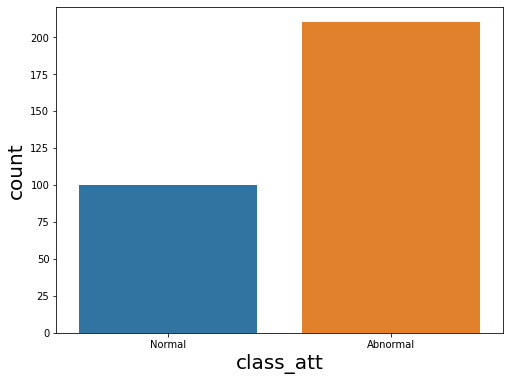

In [344]:
plt.figure(figsize=(8, 6))

sns.countplot('class_att', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('count', fontsize = 20)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


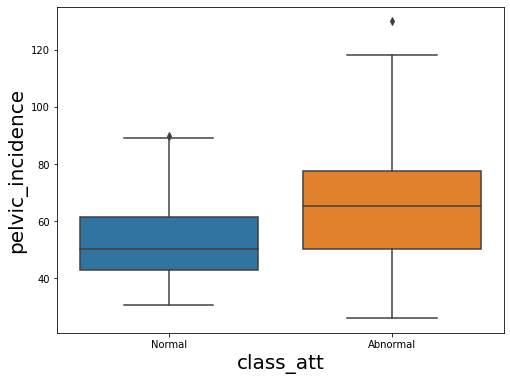

In [345]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'pelvic_incidence', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('pelvic_incidence', fontsize = 20)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


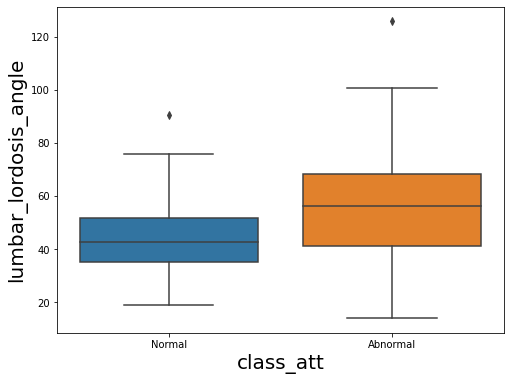

In [346]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'lumbar_lordosis_angle', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('lumbar_lordosis_angle', fontsize = 20)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


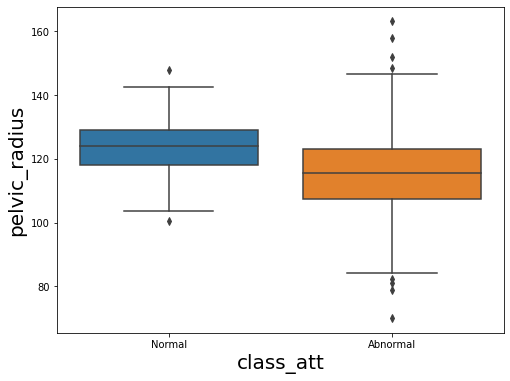

In [347]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'pelvic_radius', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('pelvic_radius', fontsize = 20)

plt.show()

### Replacing string values with integers in target column

In [348]:
class_att = {'Abnormal':0, 'Normal':1}

spine_data['class_att'].replace(class_att, inplace=True)

spine_data[['class_att']].sample(10)

,class_att
141,0
216,0
179,0
255,1
38,0
2,0
16,0
279,1
12,0
1,1


In [349]:
features = spine_data.drop('class_att', axis=1)

target = spine_data[['class_att']]

In [350]:
features.sample(5).T

,18,31,281,141,147
pelvic_incidence,63.834982,75.649731,67.804694,53.854798,82.905351
pelvic tilt,20.362507,19.339799,16.550662,19.230643,29.894119
lumbar_lordosis_angle,54.552434,64.148685,43.256802,32.779060,58.250542
sacral_slope,43.472475,56.309932,51.254033,34.624155,53.011232
pelvic_radius,112.309491,95.903629,119.685645,121.670915,110.708958
degree_spondylolisthesis,-0.622527,69.551303,4.867540,5.329843,6.079338
pelvic_slope,0.560675,0.687092,0.036158,0.417637,0.827146
direct_tilt,10.769000,24.100400,18.489400,9.351400,12.562200
thoracic_slope,16.811600,13.344400,15.401600,11.524300,12.364600
cervical_tilt,11.413440,15.756020,13.865680,12.376990,16.617540


In [351]:
target.sample(5)

,class_att
64,0
164,0
188,0
294,0
238,0


In [352]:
standardScaler = StandardScaler()

scaled_features = pd.DataFrame(standardScaler.fit_transform(features), 
                               columns=features.columns,
                               index=features.index)

scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,-9.239921e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
pelvic tilt,310.0,2.120168e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
lumbar_lordosis_angle,310.0,1.890961e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
sacral_slope,310.0,-1.403895e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
pelvic_radius,310.0,4.125732e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
degree_spondylolisthesis,310.0,-1.719055e-17,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350
pelvic_slope,310.0,2.435328e-17,1.001617,-1.646397,-0.871329,0.010547,0.812640,1.842974
direct_tilt,310.0,9.168293e-17,1.001617,-1.657245,-0.958454,0.067895,0.884884,1.788002
thoracic_slope,310.0,2.521281e-16,1.001617,-1.775578,-0.779769,-0.037140,0.832300,1.844158
cervical_tilt,310.0,1.719055e-16,1.001617,-1.697267,-0.828145,0.007103,0.844180,1.692090


In [353]:
scaled_features.shape

(310, 12)

### Splitting dataset into training and testing

In [354]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_features, 
                                                    target, 
                                                    test_size=0.15,
                                                    random_state=10)

In [355]:
x_train.shape, x_test.shape

((263, 12), (47, 12))

In [356]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.15,
                                                  random_state=10)

In [357]:
x_train.shape, x_val.shape, x_test.shape

((223, 12), (40, 12), (47, 12))

In [358]:
y_train.shape, y_val.shape, y_test.shape

((223, 1), (40, 1), (47, 1))

### Building model : Like  x = layers.Dense(...)

1. לבנות מבנה בצורת functional keras (טנסור אינפוט וטנסור אאוטפוט)
2. כמה נויורונים יהיו בכל שכבה
3. כתיבת פייתון מתקדם - שימוש בקלאס ובבנאי מודל.
4. פונקציית call שבונה עוד שכבות? 
5. להשתמש לא בsequantial רק מחלקות!
6. גם הקומפייל ליצור אותו בתוך הקלאס
7. גם האופטימייזר
8. 

לבנות מחלקה ולבצע לה אימון
לשמור משקולות ולהדגים במחברת טעינה מחדש.

# class SPINE

In [359]:
class Spine(keras.Model):
    
    def __init__(self, input_shape,lr=0.001, type="adam"):
    
        super(Spine, self).__init__()

        self.d1 = layers.Dense((input_shape*3), activation = 'elu', input_shape = [input_shape])
        self.d2 = layers.Dense((input_shape*2), activation = 'elu')
        
        self.d3 = layers.Dense(1, activation = 'sigmoid')
        self.cmp(type,lr)
        

    def cmp(self,opt,lr):
        if opt == 'adam':
            
            self.compile(optimizer = keras.optimizers.Adam(learning_rate=lr),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ['accuracy'])
        elif opt == 'sgd':
            self.compile(optimizer = keras.optimizers.SGD(lr = lr),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ['accuracy'])
        elif opt == 'rmsprop':
            self.compile(optimizer = keras.optimizers.RMSprop(lr = lr),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ['accuracy'])
        else:
            print("Adam is best optimizer, Dont be stopid choose Adam")
      

    def fit_func(self, x_train, y_train, x_val, y_val, epochs, batch_size):
        
        history=self.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
        return history

    def call(self, data):#<--------------------------------------forwared
        
        x = self.d1(data)
        x = self.d2(x)

        x = self.d3(x)
        
        return x

    def predict_func(self, x_test,y_test ):
        score = self.evaluate(x_test, y_test)
        score_df = pd.Series(score, index = self.metrics_names)

        return score_df

 
    def save_model_json(self, path):
        # self.save_model_json(path)
        model = tf.keras.Sequential([
        self.d1,
        self.d2,
        self.d3 ])
        js = model.to_json()
        import pprint
        pprint.pprint(js)
        with open(path, 'w') as f:
            f.write(js)
            
    def save_weights_model(self, path):
        
        model = tf.keras.Sequential([
        self.d1,
        self.d2,
        self.d3 ])

        model.save_weights("wwww")
    
    
        
        
    


    # def graphs

    # def early stoppin
    # checkpoint
    
    

    

    


    

model = Spine(input_shape = x_train.shape[1])


In [360]:
model.fit_func(x_train, y_train, x_val, y_val, epochs=100, batch_size=32)

Epoch 1/100
7/7 [==============================] - 0s 13ms/step - loss: 0.5960 - accuracy: 0.6816 - val_loss: 0.6335 - val_accuracy: 0.6000
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7489 - val_loss: 0.5907 - val_accuracy: 0.6250
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7758 - val_loss: 0.5551 - val_accuracy: 0.6750
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7848 - val_loss: 0.5307 - val_accuracy: 0.6750
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.7982 - val_loss: 0.5094 - val_accuracy: 0.7000
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8206 - val_loss: 0.4915 - val_accuracy: 0.7500
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8206 - val_loss: 0.4768 - val_accuracy: 0.7500
Epoch 8/100
7/7 [=========

In [361]:
model.predict_func(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8085


loss        0.382631
accuracy    0.808511
dtype: float64

In [362]:
# save model to json
model.save_model_json("model.json")
model.save_weights_model("weighs")


('{"class_name": "Sequential", "config": {"name": "sequential_20", "layers": '
 '[{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 12], '
 '"dtype": "float32", "sparse": false, "ragged": false, "name": '
 '"dense_30_input"}}, {"class_name": "Dense", "config": {"name": "dense_30", '
 '"trainable": true, "batch_input_shape": [null, 12], "dtype": "float32", '
 '"units": 36, "activation": "elu", "use_bias": true, "kernel_initializer": '
 '{"class_name": "GlorotUniform", "config": {"seed": null}}, '
 '"bias_initializer": {"class_name": "Zeros", "config": {}}, '
 '"kernel_regularizer": null, "bias_regularizer": null, '
 '"activity_regularizer": null, "kernel_constraint": null, "bias_constraint": '
 'null}}, {"class_name": "Dense", "config": {"name": "dense_31", "trainable": '
 'true, "dtype": "float32", "units": 24, "activation": "elu", "use_bias": '
 'true, "kernel_initializer": {"class_name": "GlorotUniform", "config": '
 '{"seed": null}}, "bias_initializer": {"class_nam

# load model:

In [363]:
#load model
import json
with open('model.json', 'r') as infile: 
    
    model_json = json.load(infile)



In [364]:
# import pprint

# pprint.pprint(model_json)

In [365]:
model = tf.keras.models.model_from_json(json.dumps(model_json))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 36)                468       
                                                                 
 dense_31 (Dense)            (None, 24)                888       
                                                                 
 dense_32 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


# without weights

In [366]:
y_pred_after_loading = model.predict(x_test)
# r2 score import
from sklearn.metrics import r2_score

r2_score( y_test,y_pred_after_loading)

2/2 [==============================] - 0s 1ms/step


0.10495598687802632

# adding weights

In [367]:
# load weights into new model
model.load_weights("wwww")


In [368]:
y_pred_after_loading = model.predict(x_test)
# r2 score import
from sklearn.metrics import r2_score

r2_score( y_test,y_pred_after_loading)

2/2 [==============================] - 0s 1ms/step


0.4811355289562389